In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf

In [2]:
df= pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [23]:
df.drop('Unnamed: 0', inplace=True,axis=1)

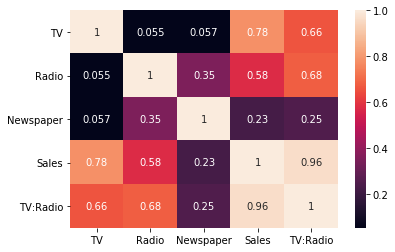

In [24]:
sns.heatmap(df.corr(), annot=True)
plt.show()

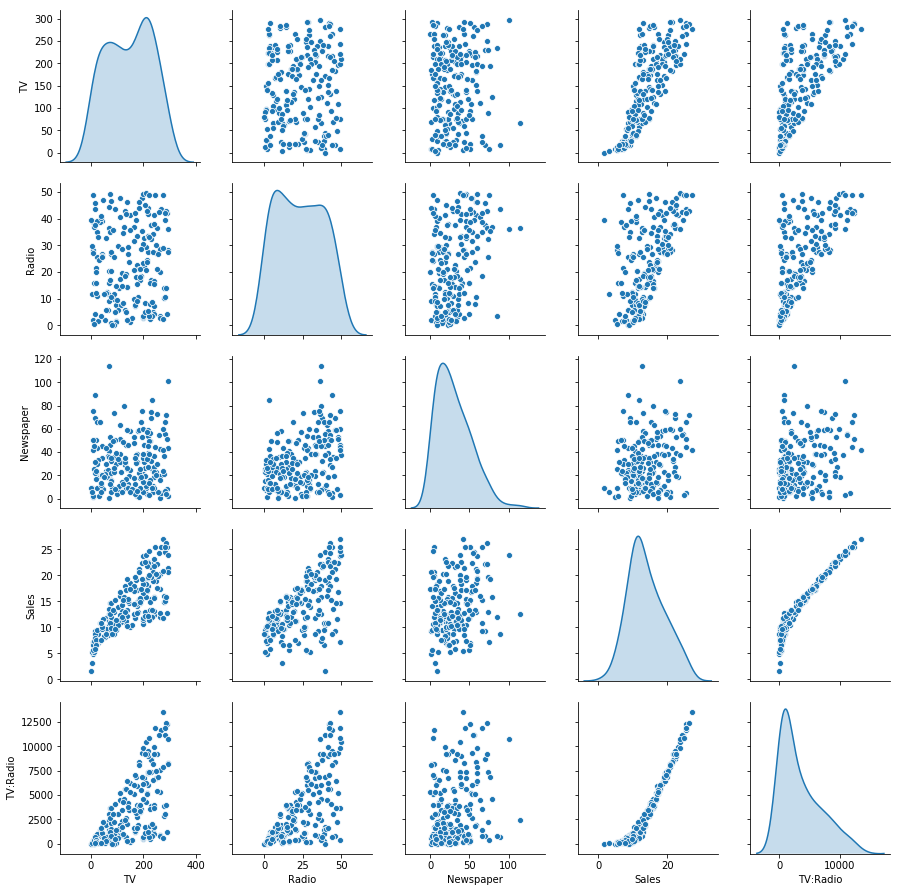

In [31]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [25]:
#Only TV

x=pd.DataFrame(df.TV)
y=df.Sales

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  7.032593549127693 

Coef :  [0.04753664]

RMSE :  3.2423221486546883 

R Sqare:  0.611875050850071


In [26]:
#only Radio

x=pd.DataFrame(df.Radio)
y=df.Sales

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  9.311638095158283 

Coef :  [0.20249578]

RMSE :  4.2535159274564185 

R Sqare:  0.33203245544529525


In [27]:
#Only Newspaper

x=pd.DataFrame(df.Newspaper)
y=df.Sales

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  12.35140706927816 

Coef :  [0.0546931]

RMSE :  5.066953988399708 

R Sqare:  0.05212044544430516


In [28]:
#Only Radio and TV

x=pd.DataFrame(df[['TV','Radio']])
y=df.Sales

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  2.9210999124051362 

Coef :  [0.04575482 0.18799423]

RMSE :  1.6687030593661925 

R Sqare:  0.8971942610828956


In [29]:
df['TV:Radio']= df.TV * df.Radio

In [33]:
# Radio, TV, Newspaper

x=pd.DataFrame(df[['TV','Radio','Newspaper']])
y=df.Sales

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  2.9388893694594085 

Coef :  [ 0.04576465  0.18853002 -0.00103749]

RMSE :  1.66857014072257 

R Sqare:  0.8972106381789521


In [34]:
# Radio and TV and interaction

x=pd.DataFrame(df[['TV','Radio','TV:Radio']])
y=df.Sales

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  6.750220203075118 

Coef :  [0.01910107 0.02886034 0.00108649]

RMSE :  0.9340326081773782 

R Sqare:  0.9677905498482523


In [38]:
m1=smf.ols('Sales~TV',df).fit()
m2=smf.ols('Sales~Radio',df).fit()
m3=smf.ols('Sales~Newspaper',df).fit()
m4=smf.ols('Sales~TV+Radio',df).fit()
m5=smf.ols('Sales~TV+Newspaper',df).fit()
m6=smf.ols('Sales~Radio+Newspaper',df).fit()
m7=smf.ols('Sales~TV+Radio+Newspaper',df).fit()

In [39]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           1.47e-42
Time:                        12:19:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           4.35e-19
Time:                        12:57:22   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 10 Jan 2019   Prob (F-statistic):            0.00115
Time:                        12:58:15   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           4.83e-98
Time:                        12:58:26   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           3.95e-45
Time:                        12:58:45   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     49.11
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           4.96e-18
Time:                        12:58:54   Log-Likelihood:                -573.24
No. Observations:                 200   AIC:                             1152.
Df Residuals:                     197   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1889      0.628     14.640      0.000       7.951      10.427
Radio          0.1990      0.022      9.101      0.000       0.156       0.242
Newspaper      0.0066      0.015      0.446      0.656      -0.023       0.036
==============================================================================
Omnibus:                       19.261   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.768
Skew:                          -0.765   Prob(JB):                     1.88e-05
Kurtosis:                       3.519   Cond. No.                         92.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           1.58e-96
Time:                        12:59:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
m8= smf.ols('Sales~TV+Radio+TV:Radio',df).fit()
m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          6.68e-146
Time:                        13:06:59   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
m8.params

Intercept    6.750220
TV           0.019101
Radio        0.028860
TV:Radio     0.001086
dtype: float64

In [48]:
y8_predict = m8.params[0] + m8.params[1]*df.TV + m8.params[2]*df.Radio + m8.params[3]*df['TV:Radio']

0    21.686390
1    10.634546
2     9.261214
3    17.634108
4    12.636919
dtype: float64

In [50]:
0.019*50

0.95

In [52]:
0.95+6.75

7.7

In [53]:
50*0.001086

0.054299999999999994

In [54]:
0.0543+0.0280

0.0823

In [55]:
0.0280*50

1.4000000000000001

In [56]:
6.75+1.4

8.15

In [57]:
0.001086*50

0.054299999999999994

In [58]:
0.0543+0.019

0.0733

In [59]:
8.15-7.7

0.4500000000000002

In [75]:
s1={}
for i in range(1,30):
    temp= 8.15+0.073*(i)
    s1[i]= temp
s1

{1: 8.223,
 2: 8.296000000000001,
 3: 8.369,
 4: 8.442,
 5: 8.515,
 6: 8.588000000000001,
 7: 8.661,
 8: 8.734,
 9: 8.807,
 10: 8.88,
 11: 8.953,
 12: 9.026,
 13: 9.099,
 14: 9.172,
 15: 9.245000000000001,
 16: 9.318,
 17: 9.391,
 18: 9.464,
 19: 9.537,
 20: 9.61,
 21: 9.683,
 22: 9.756,
 23: 9.829,
 24: 9.902000000000001,
 25: 9.975,
 26: 10.048,
 27: 10.121,
 28: 10.194,
 29: 10.267}

In [81]:
s2={}
for i in range(1,30):
    temp= 7.7+0.0823*(i)
    s2[i]= temp


In [78]:
pd.concat([s1,s2],axis=1)

TypeError: cannot concatenate object of type "<class 'dict'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [86]:
data=pd.DataFrame({'exp':[2.5,3.0,5.7,4.8,7.0,12,8],'g':[0,1,0,1,1,0,1],'sal':[6500,8000,4000,12000,10000,15000,6000]})
data

,exp,g,sal
0,2.5,0,6500
1,3.0,1,8000
2,5.7,0,4000
3,4.8,1,12000
4,7.0,1,10000
5,12.0,0,15000
6,8.0,1,6000


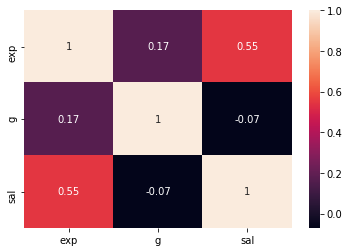

In [71]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [72]:
# Only Exp

x=pd.DataFrame(data[['exp']])
y=data.sal

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  4841.108068064473 

Coef :  [642.14519822]

RMSE :  2944.4321931005506 

R Sqare:  0.3018662842258357


In [73]:
# Only Gender

x=pd.DataFrame(data[['g']])
y=data.sal

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  9000.0 

Coef :  [-500.]

RMSE :  3515.2727998183664 

R Sqare:  0.004930156121610518


In [87]:
# both

x=pd.DataFrame(data[['exp','g']])
y=data.sal

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  3951.6772732175596 

Coef :  [ 675.49347427 1198.00992342]

RMSE :  2885.880589773859 

R Sqare:  0.3293557401097087


In [85]:
np.sqrt(np.mean((data.sal - data.sal.mean())**2))

3523.9703952982886

In [89]:
3951+1198+6750

11899

In [90]:
3951+6750

10701

In [91]:
data['g:exp']=data.g*data.exp

In [92]:
x=pd.DataFrame(data[['exp','g','g:exp']])
y=data.sal

model= LinearRegression()
model.fit(x,y)

print('Intercept : ', model.intercept_,'\n\nCoef : ', model.coef_)
ypred= model.predict(x)
rmse=np.sqrt(np.mean((ypred-y)**2))
print('\nRMSE : ', rmse, '\n\nR Sqare: ',model.score(x,y))

Intercept :  1676.8440576401808 

Coef :  [ 1013.33999144  9439.86681769 -1384.69277659]

RMSE :  2281.565120967842 

R Sqare:  0.5808193415618189


In [96]:
ypred

array([ 4210.19403624, 10002.65251989,  7452.88200885,  9334.21750663,
        8517.24137931, 13836.92395492,  8145.88859416])

In [94]:
1676+10130

11806

In [95]:
11115-3710

7405